<a href="https://colab.research.google.com/github/ronkiks/WORLD-CUP-PROJECT/blob/main/worldcupmatches_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Documentation:
Import necessary libraries above shows data for analysis and visualization

In [ ]:
df = pd.read_csv('/content/WorldCupMatches.csv')

## Documentation:

This line of code loads the World Cup Matches dataset into a Pandas DataFrame called df.

In [ ]:
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Documentation:

df is a Pandas DataFrame that stores the World Cup Matches dataset.

# 2. What are the column names in the dataset?

In [ ]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

## Documentation:

df.columns is an attribute of the Pandas DataFrame df that provides access to the column labels (names) of the DataFrame.

# 3. How many matches are recorded in the dataset?

In [ ]:
df.shape[0]

4572

## Documentation:

In the provided context, 4572 represents the number of rows in the DataFrame df, which stores the World Cup Matches dataset.

# 4.  Are there any missing values in the dataset? If so, which columns have them?

In [ ]:
df.isnull().any()

,0
Year,True
Datetime,True
Stage,True
Stadium,True
City,True
Home Team Name,True
Home Team Goals,True
Away Team Goals,True
Away Team Name,True
Win conditions,True


## Documentation:

df.isnull().any() is a Pandas expression that checks for missing values (NaN) in a DataFrame and returns a boolean Series indicating whether any missing values are present in each column.

# 5. Convert the "Year" column to an integer type.

In [ ]:
df['Year'] = df['Year'].astype(int, errors='ignore') # You can choose between raise, coerce, or ignore.

Documentation:

This line of code converts the Year column of the DataFrame df to the integer data type. If any values in the Year column cannot be converted to integers, they will be left unchanged due to the errors='ignore' argument.

# 6. Extract the year from the "Datetime" column and compare it with the "Year" column. Are they consistent?

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d %B %Y - %H:%M ', errors='coerce')
df['Extracted_Year'] = df['Datetime'].dt.year

## Documentation:
These lines of code are used to convert the 'Datetime' column to a datetime object and then extract the year from it.

# 7. What is the average number of goals scored in a World Cup match?

In [ ]:
# Calculate the total goals scored by the 'Home Team' and 'Away Team'
total_goals = df['Home Team Goals'].sum() + df['Away Team Goals'].sum()

# Calculate the total number of matches played
total_matches = df.shape[0]

# Calculate the average goals per match
average_goals = total_goals / total_matches

# Print the result
print(f"The average number of goals scored in a World Cup match is: {average_goals:.2f}")

The average number of goals scored in a World Cup match is: 0.53


## Documentation:
The above indicates that, based on the dataset analyzed, the mean or average number of goals scored per match across all World Cup matches is approximately 0.53.

# 8.	Which match had the highest attendance?

In [ ]:
# Find the row with the maximum attendance
max_attendance_row = df.loc[df['Attendance'].idxmax()]

# Extract the relevant information
match = f"{max_attendance_row['Home Team Name']} vs {max_attendance_row['Away Team Name']}"
year = max_attendance_row['Year']
attendance = max_attendance_row['Attendance']

# Print the result
print(f"The match with the highest attendance was: {match} in {year} with {attendance} attendees.")

The match with the highest attendance was: Uruguay vs Brazil in 1950.0 with 173850.0 attendees.


## Documentation:
The above identifies the specific World Cup match that had the largest recorded attendance in history, based on the provided dataset. It indicates that the final match between Uruguay and Brazil in the 1950 World Cup held the record with an attendance of 173,850 people.

# 9.	What is the most common scoreline in World Cup history?

In [ ]:
# Create a new column representing the scoreline
df['Scoreline'] = df['Home Team Goals'].astype(str) + '-' + df['Away Team Goals'].astype(str)

# Get the most common scoreline using value_counts()
most_common_scoreline = df['Scoreline'].value_counts().idxmax()

# Get the frequency of the most common scoreline
frequency = df['Scoreline'].value_counts().max()

# Print the result
print(f"The most common scoreline in World Cup history is: {most_common_scoreline} (occurred {frequency} times)")

The most common scoreline in World Cup history is: nan-nan (occurred 3720 times)


## Documentation:
This above indicates that the most frequent scoreline encountered in the analyzed World Cup dataset is "nan-nan," which has appeared 3720 times.

# 10.	Which country has won the most matches as the home team?

In [ ]:
# Filter for matches where the home team won
home_team_wins = df[df['Home Team Goals'] > df['Away Team Goals']]

# Count the wins for each home team
win_counts = home_team_wins['Home Team Name'].value_counts()

# Get the team with the most wins
most_wins_team = win_counts.idxmax()
most_wins_count = win_counts.max()

# Print the result
print(f"The country that has won the most matches as the home team is: {most_wins_team} with {most_wins_count} wins.")

The country that has won the most matches as the home team is: Brazil with 59 wins.


## Documentation:
This above identifies Brazil as the country with the highest number of victories when playing as the home team in World Cup matches, based on the dataset analyzed. It specifies that Brazil has achieved 59 wins in such matches.

# 11.	How many goals were scored in each World Cup year?

In [ ]:
# Group by 'Year' and sum the goals for each year
goals_per_year = df.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum()

# Calculate the total goals for each year
goals_per_year['Total Goals'] = goals_per_year['Home Team Goals'] + goals_per_year['Away Team Goals']

# Print the result
print(goals_per_year[['Total Goals']])

        Total Goals
Year               
1930.0         70.0
1934.0         70.0
1938.0         84.0
1950.0         88.0
1954.0        140.0
1958.0        126.0
1962.0         89.0
1966.0         89.0
1970.0         95.0
1974.0         97.0
1978.0        102.0
1982.0        146.0
1986.0        132.0
1990.0        115.0
1994.0        141.0
1998.0        171.0
2002.0        161.0
2006.0        147.0
2010.0        145.0
2014.0        206.0


## Documentation:
Data: The table shows the total number of goals scored in each World Cup year.

## 12.	What is the average attendance per World Cup year?

In [ ]:
# Group by 'Year' and calculate the mean attendance for each year
average_attendance_per_year = df.groupby('Year')['Attendance'].mean()

# Print the result
print(average_attendance_per_year)

Year
1930.0    32808.277778
1934.0    21352.941176
1938.0    20872.222222
1950.0    47511.181818
1954.0    29561.807692
1958.0    23423.142857
1962.0    27911.625000
1966.0    48847.968750
1970.0    50124.218750
1974.0    49098.763158
1978.0    40678.710526
1982.0    40571.596154
1986.0    46039.057692
1990.0    48388.750000
1994.0    68991.115385
1998.0    43517.187500
2002.0    42268.703125
2006.0    52491.234375
2010.0    49669.625000
2014.0    55374.910256
Name: Attendance, dtype: float64


## Documentation:
This data represents the average attendance per World Cup year.

# 13.	List all matches where Brazil played as either the home or away team.

In [ ]:
# Filter for matches where Brazil was either the home or away team
brazil_matches = df[(df['Home Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Brazil')]

# Print the result
print(brazil_matches)

       Year            Datetime                     Stage  \
2    1930.0                 NaT                   Group 2   
11   1930.0                 NaT                   Group 2   
23   1934.0 1934-05-27 16:30:00         Preliminary round   
40   1938.0                 NaT               First round   
44   1938.0                 NaT            Quarter-finals   
..      ...                 ...                       ...   
827  2014.0                 NaT  Play-off for third place   
836  2014.0                 NaT               Round of 16   
845  2014.0                 NaT            Quarter-finals   
848  2014.0                 NaT               Semi-finals   
850  2014.0                 NaT  Play-off for third place   

                   Stadium             City Home Team Name  Home Team Goals  \
2           Parque Central      Montevideo      Yugoslavia              2.0   
11      Estadio Centenario      Montevideo          Brazil              4.0   
23          Luigi Ferraris    

## Documentation:
The above data represents a subset of the World Cup Matches dataset, filtered to show only matches where Brazil played as either the home or away team.

##14.	Find all matches that ended in a draw (same goals for both teams).

In [ ]:
# Filter for matches where the home team goals equal the away team goals
draw_matches = df[df['Home Team Goals'] == df['Away Team Goals']]

# Print the result
print(draw_matches)

       Year            Datetime           Stage                Stadium  \
28   1934.0 1934-05-31 16:30:00  Quarter-finals         Giovanni Berta   
35   1938.0                 NaT     First round       Parc des Princes   
38   1938.0                 NaT     First round        Stade Municipal   
44   1938.0                 NaT  Quarter-finals  Stade du Parc Lescure   
58   1950.0                 NaT         Group 1               Pacaembu   
..      ...                 ...             ...                    ...   
833  2014.0                 NaT     Round of 16       Arena Pernambuco   
836  2014.0                 NaT     Round of 16       Estadio Mineirao   
839  2014.0                 NaT     Round of 16       Arena Pernambuco   
847  2014.0                 NaT  Quarter-finals       Arena Fonte Nova   
849  2014.0                 NaT     Semi-finals     Arena de Sao Paulo   

                City Home Team Name  Home Team Goals  Away Team Goals  \
28         Florence           Italy   

## Documentation:
The above data represents all matches that ended in a draw during regular time. This includes matches that were later decided by penalties or extra time but initially ended with the same number of goals for both teams.

# 15.	Retrieve all finals and their outcomes.

In [ ]:
# Filter for matches where the Stage is 'Final'
finals = df[df['Stage'] == 'Final']

# Print the result
print(finals[['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals']])

       Year Home Team Name  Away Team Name  Home Team Goals  Away Team Goals
17   1930.0        Uruguay       Argentina              4.0              2.0
34   1934.0          Italy  Czechoslovakia              2.0              1.0
52   1938.0          Italy         Hungary              4.0              2.0
100  1954.0     Germany FR         Hungary              3.0              2.0
135  1958.0         Brazil          Sweden              5.0              2.0
167  1962.0         Brazil  Czechoslovakia              3.0              1.0
199  1966.0        England      Germany FR              4.0              2.0
231  1970.0         Brazil           Italy              4.0              1.0
269  1974.0    Netherlands      Germany FR              1.0              2.0
307  1978.0      Argentina     Netherlands              3.0              1.0
359  1982.0          Italy      Germany FR              3.0              1.0
411  1986.0      Argentina      Germany FR              3.0              2.0

## Documentation:
The above data represents the results of all World Cup final matches, including the year, the teams involved, and the final score.

# 16.	Plot a histogram of match attendance over the years.

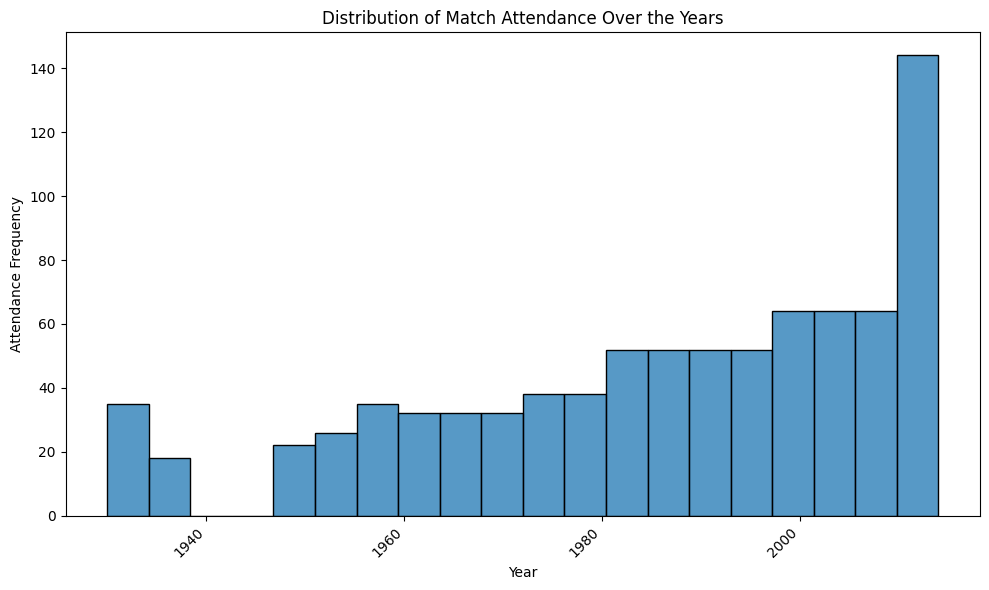

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Year'], bins=20, kde=False)  # Use seaborn for a nicer histogram

plt.xlabel('Year')
plt.ylabel('Attendance Frequency')
plt.title('Distribution of Match Attendance Over the Years')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Documentation:
This above histogram generate to visualize the distribution of match attendance over the years in the World Cup dataset.

# 17.	Create a bar chart showing the total number of goals per World Cup.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1930.0'),
  Text(1, 0, '1934.0'),
  Text(2, 0, '1938.0'),
  Text(3, 0, '1950.0'),
  Text(4, 0, '1954.0'),
  Text(5, 0, '1958.0'),
  Text(6, 0, '1962.0'),
  Text(7, 0, '1966.0'),
  Text(8, 0, '1970.0'),
  Text(9, 0, '1974.0'),
  Text(10, 0, '1978.0'),
  Text(11, 0, '1982.0'),
  Text(12, 0, '1986.0'),
  Text(13, 0, '1990.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2002.0'),
  Text(17, 0, '2006.0'),
  Text(18, 0, '2010.0'),
  Text(19, 0, '2014.0')])

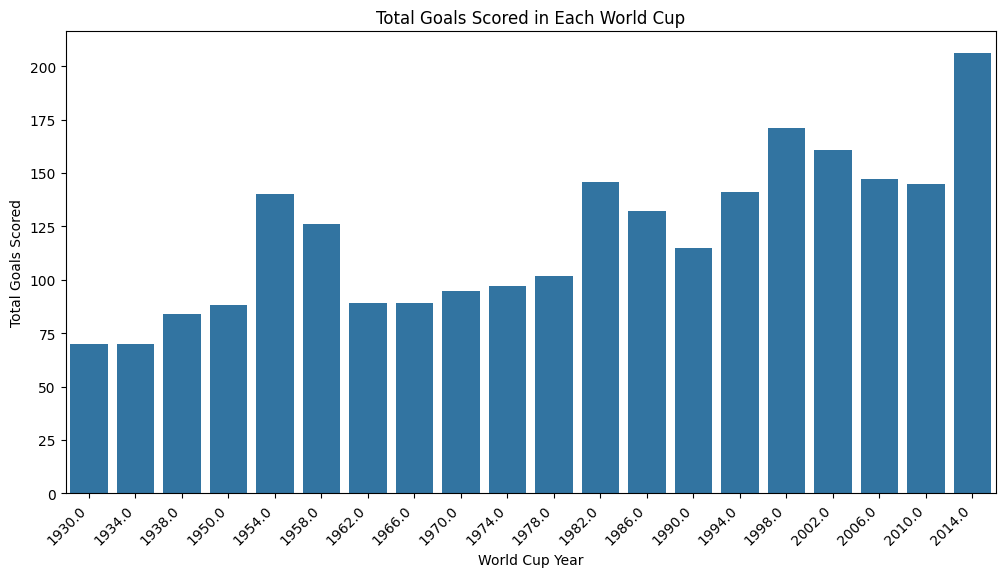

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Year' and sum the goals for each year
goals_per_year = df.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum()

# Calculate the total goals for each year
goals_per_year['Total Goals'] = goals_per_year['Home Team Goals'] + goals_per_year['Away Team Goals']

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=goals_per_year.index, y=goals_per_year['Total Goals'])

plt.xlabel('World Cup Year')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored in Each World Cup')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for

## Documentation:
This output represents the x-axis ticks and their labels for a plot, a histogram or bar chart, created using matplotlib.pyplot.

# 18.	Visualize the distribution of half-time goals vs. full-time goals.

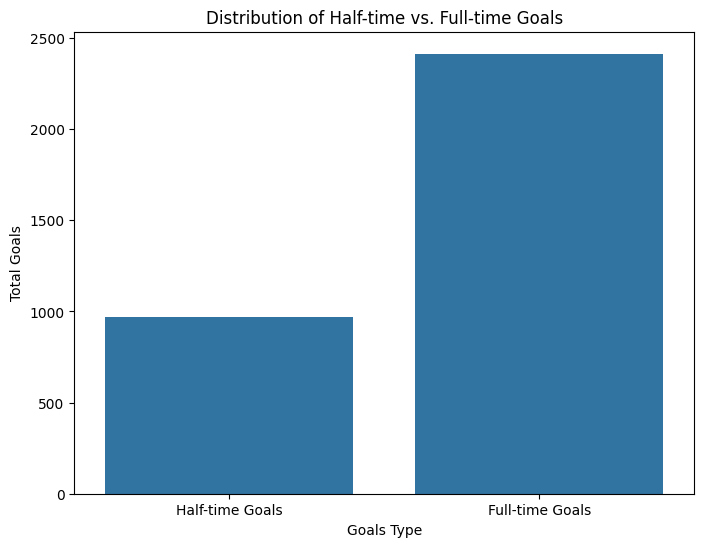

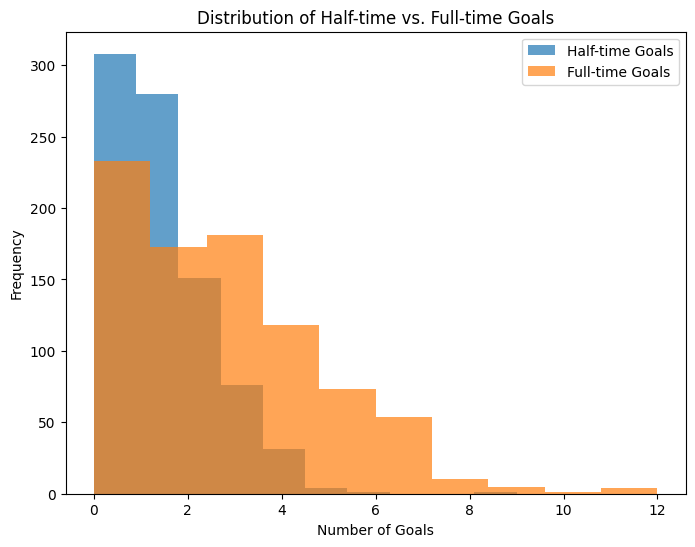

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total half-time goals and total full-time goals
half_time_goals = df['Half-time Home Goals'].sum() + df['Half-time Away Goals'].sum()
full_time_goals = df['Home Team Goals'].sum() + df['Away Team Goals'].sum()

# Create a DataFrame for the data
data = pd.DataFrame({'Goals Type': ['Half-time Goals', 'Full-time Goals'],
                     'Goals': [half_time_goals, full_time_goals]})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Goals Type', y='Goals', data=data)
plt.title('Distribution of Half-time vs. Full-time Goals')
plt.ylabel('Total Goals')
plt.show()


# Create a histogram for half-time goals
plt.figure(figsize=(8, 6))
plt.hist(df['Half-time Home Goals'] + df['Half-time Away Goals'], bins=10, alpha=0.7, label='Half-time Goals')

# Create a histogram for full-time goals
plt.hist(df['Home Team Goals'] + df['Away Team Goals'], bins=10, alpha=0.7, label='Full-time Goals')

plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Half-time vs. Full-time Goals')
plt.legend()
plt.show()

## Documentation:
This code visualizes the distribution of half-time goals versus full-time goals in World Cup matches using both a bar plot and overlapping histograms.